## End to end NLP project
+ Emotion Detection in Text
+ Text Classifier


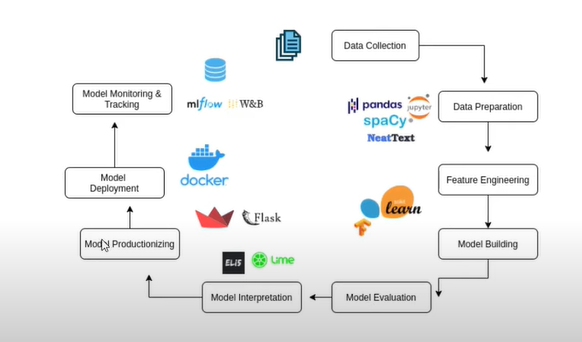

In [3]:
#Load EDA Pkgs
import pandas as pd
import numpy as np

In [6]:
# Load Data Viz Pkgs
import seaborn as sns

In [7]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [10]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Laod Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [14]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [15]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

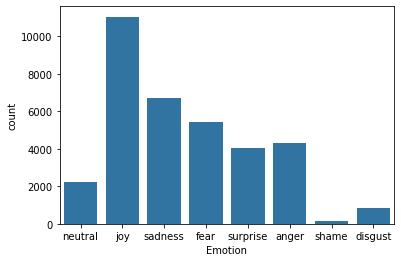

In [16]:
# Plot 
sns.countplot(x='Emotion', data=df)

In [17]:
# Data Cleaning 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
#User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles) 

In [20]:
#Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords) 

In [21]:
df


,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [22]:

df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters) 

In [26]:
# Feaetures & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [27]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=43)

In [28]:
# Build pipeline
from sklearn.pipeline import Pipeline

In [29]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps = [('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [30]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

C:\Users\sahoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [31]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [32]:
# Check Accuracy
pipe_lr.score(x_test, y_test)

0.6262694002682506

In [34]:
# Make a Prediction
ex1 = "This book was so interesting it made me happy"

In [35]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [37]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.44674047e-03, 2.39194167e-03, 7.41941520e-03, 9.08483855e-01,
        1.62427548e-05, 2.67905519e-02, 6.54843280e-05, 5.33857683e-02]])

In [39]:
# To know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

### Model Evaluation

In [43]:
# Save Model & Peipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_nov_2023.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()